In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


ss=StandardScaler()

In [2]:
data=pd.read_parquet('/home/hashmi/Files/UpgradeSeedClassifier/InitialAnalysis/data/true_no_hits_15114101.parquet')[
    ['track_chi2PerDoF','track_nLHCbIDs','track_p',
     'track_phi','track_position_x', 'track_position_y',
     'track_position_r','track_tx', 'track_ty',
     'track_pseudoRapidity','particle_isDown_noVelo']].sample(frac=0.001,random_state=33)

In [3]:
data.head()

,track_chi2PerDoF,track_nLHCbIDs,track_p,track_phi,track_position_x,track_position_y,track_position_r,track_tx,track_ty,track_pseudoRapidity,particle_isDown_noVelo
141,0.043089,12.0,9881.849109,-2.729041,-1178.360474,-754.266174,1399.089299,-0.241584,-0.105734,2.043007,True
23,0.397143,10.0,2120.491724,0.017458,1403.945190,100.739586,1407.554817,0.636254,0.011109,1.233759,False
67,0.486239,12.0,2588.278044,-0.008683,1176.627930,-24.433453,1176.881591,0.489243,-0.004248,1.463097,False
14,0.157477,12.0,9449.625121,-3.010868,392.595123,-23.308462,393.286429,-0.029867,-0.003927,4.195794,False
23,0.975142,11.0,9491.767706,-1.431159,929.776367,-1567.486084,1822.497384,0.029111,-0.207121,2.268580,False


In [4]:
x=data.drop('particle_isDown_noVelo',axis=1)
y=data['particle_isDown_noVelo']
x=pd.DataFrame(ss.fit_transform(x),columns=x.columns)

In [5]:
sample=x.copy()

In [6]:
%%time
inertia=[]
for i in range(10):
    kmeans=KMeans(n_clusters=i+1)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

CPU times: user 7min 53s, sys: 3min 1s, total: 10min 55s
Wall time: 18.7 s


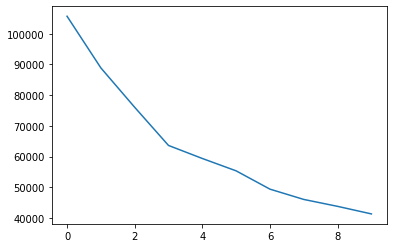

In [7]:
plt.plot(inertia)

## There is a chance that the data has an underlying pattern with three clusters. As a second model, can try Heirarchical clustering methods to confirm the existance of a second cluster.

### Best Cluster number is 4, let's say for higher samples on Lower samples it is found approx. 3

In [8]:
%%time
kmeans=KMeans(n_clusters=2)
kmeans.fit(x)
sample['Label_KMeans_n2']=kmeans.labels_

CPU times: user 41.7 s, sys: 16.3 s, total: 58 s
Wall time: 1.62 s


In [9]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(x)
sample['Label_KMeans_n4']=kmeans.labels_

In [10]:
sample.head()

,track_chi2PerDoF,track_nLHCbIDs,track_p,track_phi,track_position_x,track_position_y,track_position_r,track_tx,track_ty,track_pseudoRapidity,Label_KMeans_n2,Label_KMeans_n4
0,-1.084170,0.697194,-0.075541,-1.281381,-1.555291,-1.669723,1.388465,-0.772321,-1.816905,-0.493748,1,1
1,-0.395827,-2.161086,-0.362452,0.026618,1.919259,0.229652,1.405700,2.186025,0.200917,-1.446085,0,0
2,-0.222609,0.697194,-0.345160,0.014168,1.613399,-0.048417,0.936062,1.690590,-0.064297,-1.176196,0,0
3,-0.861780,0.697194,-0.091519,-1.415598,0.558465,-0.045918,-0.659295,-0.058830,-0.058747,2.039691,1,2
4,0.727905,-0.731946,-0.089961,-0.663275,1.281254,-3.476271,2.250501,0.139930,-3.567821,-0.228289,1,1


<AxesSubplot:xlabel='track_position_x', ylabel='track_position_y'>

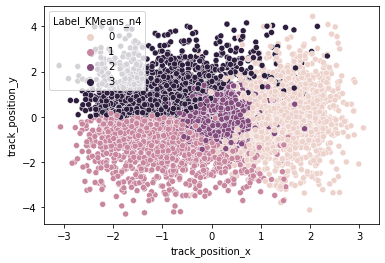

In [11]:
sns.scatterplot(sample['track_position_x'],sample['track_position_y'],hue=sample['Label_KMeans_n4'])

<AxesSubplot:xlabel='track_position_x', ylabel='track_position_y'>

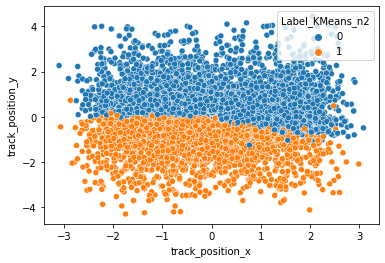

In [12]:
sns.scatterplot(sample['track_position_x'],sample['track_position_y'],hue=sample['Label_KMeans_n2'])

<AxesSubplot:xlabel='track_position_x', ylabel='track_position_y'>

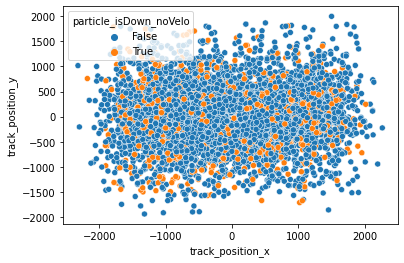

In [13]:
sns.scatterplot(data['track_position_x'],data['track_position_y'],hue=data['particle_isDown_noVelo'])

# Heirarchical Clustering

In [14]:
#Memory Error

In [15]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
agglo=AgglomerativeClustering(n_clusters=2)
agglo.fit(x)
sample['Label_Agglomerative_n2']=agglo.labels_

In [17]:
agglo=AgglomerativeClustering(n_clusters=4)
agglo.fit(x)
sample['Label_Agglomerative_n4']=agglo.labels_

In [18]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [19]:
link=linkage(x,'ward')

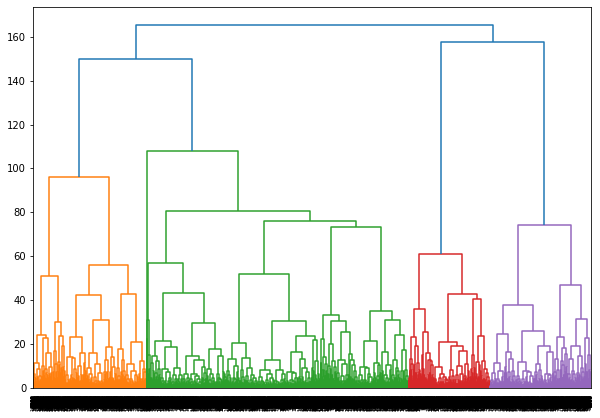

CPU times: user 3min 19s, sys: 10 s, total: 3min 29s
Wall time: 3min 25s


In [20]:
%%time
plt.figure(figsize=(10,7))
dendrogram(link,show_leaf_counts=True,orientation='top')
plt.show()

In [21]:
sample['Actual Class']=y.map({True:1,False:0}).values

In [28]:
sample.head()

,track_chi2PerDoF,track_nLHCbIDs,track_p,track_phi,track_position_x,track_position_y,track_position_r,track_tx,track_ty,track_pseudoRapidity,Label_KMeans_n2,Label_KMeans_n4,Label_Agglomerative_n2,Label_Agglomerative_n4,Actual Class
0,-1.084170,0.697194,-0.075541,-1.281381,-1.555291,-1.669723,1.388465,-0.772321,-1.816905,-0.493748,1,1,0,2,1
1,-0.395827,-2.161086,-0.362452,0.026618,1.919259,0.229652,1.405700,2.186025,0.200917,-1.446085,0,0,1,1,0
2,-0.222609,0.697194,-0.345160,0.014168,1.613399,-0.048417,0.936062,1.690590,-0.064297,-1.176196,0,0,1,1,0
3,-0.861780,0.697194,-0.091519,-1.415598,0.558465,-0.045918,-0.659295,-0.058830,-0.058747,2.039691,1,2,1,0,0
4,0.727905,-0.731946,-0.089961,-0.663275,1.281254,-3.476271,2.250501,0.139930,-3.567821,-0.228289,1,1,0,2,0


0    6377
1    4192
Name: Label_KMeans_n2, dtype: int64


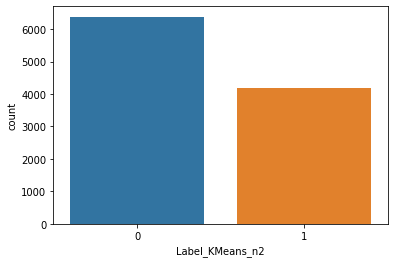

In [30]:
sns.countplot(sample['Label_KMeans_n2'])
print(sample['Label_KMeans_n2'].value_counts())

1    7124
0    3445
Name: Label_Agglomerative_n2, dtype: int64


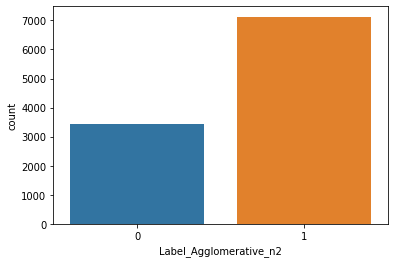

In [31]:
sns.countplot(sample['Label_Agglomerative_n2'])
print(sample['Label_Agglomerative_n2'].value_counts())

0    9132
1    1437
Name: Actual Class, dtype: int64


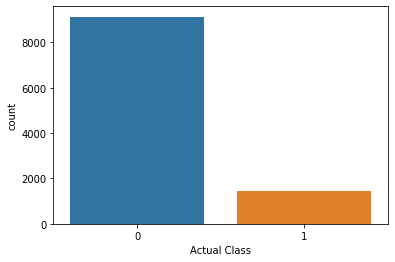

In [32]:
sns.countplot(sample['Actual Class'])
print(sample['Actual Class'].value_counts())

2    4501
0    2256
1    1963
3    1849
Name: Label_KMeans_n4, dtype: int64


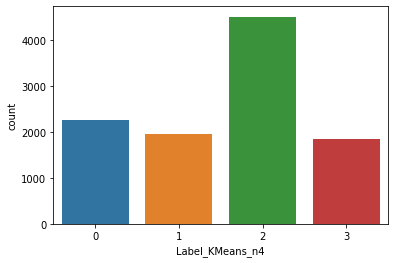

In [33]:
sns.countplot(sample['Label_KMeans_n4'])
print(sample['Label_KMeans_n4'].value_counts())

0    4973
1    2151
3    1911
2    1534
Name: Label_Agglomerative_n4, dtype: int64


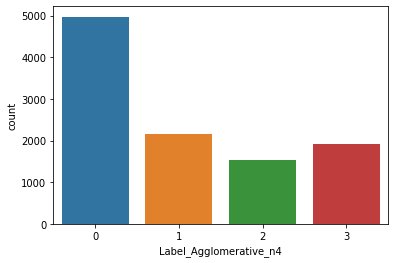

In [34]:
sns.countplot(sample['Label_Agglomerative_n4'])
print(sample['Label_Agglomerative_n4'].value_counts())